#### 3. Import the required packages with their customary aliases
#### 4. Use the %matplotlib inline magic command

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at   the first 6 rows
#### 6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [2]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv", nrows=6868)
internet_df = pd.read_csv("../Data/internet_use.csv", nrows=4495)

# print(gdp_df)
# print(internet_df)

#### 7. Look at the shape of each DataFrame - how many rows? How many columns?
#### 8. Take a look at the datatypes for the columns in each DataFrame.

7.
..gdp_df:
.... Has 6868 rows, 4 columns
..internet_df:
.... Has 4495 rows, 4 columns

8.
.. gdp_df:
.... Has float64(2), object(2)
.. internet_df:
.... Has float64(2), object(2)


In [3]:
gdp_df.info()
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


#### 9. Take a look at the last 10 rows of each DataFrame in turn.

In [4]:
# gdp_df.tail(10)
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [5]:
gdp_df_drop = gdp_df.drop(['Value Footnotes'], axis=1)
internet_df_drop = internet_df.drop(['Value Footnotes'], axis=1)

print(gdp_df_drop)
print(internet_df_drop)

     Country or Area  Year        Value
0        Afghanistan  2019  2065.036398
1        Afghanistan  2018  2033.779002
2        Afghanistan  2017  2058.383832
3        Afghanistan  2016  2057.062164
4        Afghanistan  2015  2068.265904
...              ...   ...          ...
6863        Zimbabwe  1994  3263.934978
6864        Zimbabwe  1993  3033.504852
6865        Zimbabwe  1992  3054.889178
6866        Zimbabwe  1991  3426.598094
6867        Zimbabwe  1990  3324.348171

[6868 rows x 3 columns]
     Country or Area  Year     Value
0        Afghanistan  2014  6.390000
1        Afghanistan  2013  5.900000
2        Afghanistan  2012  5.454545
3        Afghanistan  2011  5.000000
4        Afghanistan  2010  4.000000
...              ...   ...       ...
4490        Zimbabwe  1997  0.033080
4491        Zimbabwe  1996  0.016790
4492        Zimbabwe  1995  0.007684
4493        Zimbabwe  1994  0.001739
4494        Zimbabwe  1990  0.000000

[4495 rows x 3 columns]


#### 11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [6]:
gdp_df_change = gdp_df_drop.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
print(gdp_df_change)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


#### 12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [7]:
internet_df_change = internet_df_drop.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
print(internet_df_change)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


#### 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [8]:
gdp_and_internet_use = pd.merge(gdp_df_change, internet_df_change, on=["Country", "Year"], how="outer")
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2065.036398                 NaN
1     Afghanistan  2018     2033.779002                 NaN
2     Afghanistan  2017     2058.383832                 NaN
3     Afghanistan  2016     2057.062164                 NaN
4     Afghanistan  2015     2068.265904                 NaN
...           ...   ...             ...                 ...
7900        Yemen  1999             NaN            0.056629
7901        Yemen  1998             NaN            0.023323
7902        Yemen  1997             NaN            0.015025
7903        Yemen  1996             NaN            0.000621
7904        Yemen  1990             NaN            0.000000

[7905 rows x 4 columns]


#### 14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [9]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


#### 15. Look at the last five rows to make sure the data is clean and as expected.

In [10]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


#### 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [11]:
subset_gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(subset_gdp_and_internet_use)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234            6.390000
10              Afghanistan  2009     1758.904043            3.550000
15              Afghanistan  2004     1200.278256            0.105809
23                  Albania  2014    11623.866679           60.100000
28                  Albania  2009    10346.864199           41.200000
...                     ...   ...             ...                 ...
7868  Virgin Islands (U.S.)  2009             NaN           27.396510
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7885                  Yemen  2014             NaN           22.550000
7890                  Yemen  2009             NaN            9.960000
7895                  Yemen  2004             NaN            0.881223

[830 rows x 4 columns]


#### 17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [12]:
# DataFrame for 2004
gdp_internet_2004 = subset_gdp_and_internet_use[subset_gdp_and_internet_use["Year"].isin([2004])]
print(gdp_internet_2004)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
15              Afghanistan  2004     1200.278256            0.105809
33                  Albania  2004     7604.838002            2.420388
63                  Algeria  2004    10058.435939            4.634475
93                   Angola  2004     5593.241537            0.464815
123     Antigua and Barbuda  2004    18745.681534           24.266544
...                     ...   ...             ...                 ...
7771     T.F.Y.R. Macedonia  2004             NaN           24.440000
7829              Venezuela  2004             NaN            8.404470
7853               Viet Nam  2004             NaN            7.642409
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7895                  Yemen  2004             NaN            0.881223

[276 rows x 4 columns]


In [13]:
# DataFrame for 2009
gdp_internet_2009 = subset_gdp_and_internet_use[subset_gdp_and_internet_use["Year"].isin([2009])]
print(gdp_internet_2009)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
10              Afghanistan  2009     1758.904043             3.55000
28                  Albania  2009    10346.864199            41.20000
58                  Algeria  2009    10782.361398            11.23000
88                   Angola  2009     7643.493749             6.00000
118     Antigua and Barbuda  2009    20046.839017            42.00000
...                     ...   ...             ...                 ...
7766     T.F.Y.R. Macedonia  2009             NaN            51.77000
7824              Venezuela  2009             NaN            32.70000
7848               Viet Nam  2009             NaN            26.55000
7868  Virgin Islands (U.S.)  2009             NaN            27.39651
7890                  Yemen  2009             NaN             9.96000

[277 rows x 4 columns]


In [14]:
# DataFrame for 2014
gdp_internet_2014 = subset_gdp_and_internet_use[subset_gdp_and_internet_use["Year"].isin([2014])]
print(gdp_internet_2014)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234                6.39
23                  Albania  2014    11623.866679               60.10
53                  Algeria  2014    11512.705405               18.09
83                   Angola  2014     8239.828837               21.26
113     Antigua and Barbuda  2014    18104.241470               64.00
...                     ...   ...             ...                 ...
7761     T.F.Y.R. Macedonia  2014             NaN               68.06
7819              Venezuela  2014             NaN               57.00
7843               Viet Nam  2014             NaN               48.31
7863  Virgin Islands (U.S.)  2014             NaN               50.07
7885                  Yemen  2014             NaN               22.55

[277 rows x 4 columns]


In [15]:
# Kevin's Code:
gdp_internet_2014 = subset_gdp_and_internet_use[subset_gdp_and_internet_use["Year"] == 2014]
print(gdp_internet_2014)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234                6.39
23                  Albania  2014    11623.866679               60.10
53                  Algeria  2014    11512.705405               18.09
83                   Angola  2014     8239.828837               21.26
113     Antigua and Barbuda  2014    18104.241470               64.00
...                     ...   ...             ...                 ...
7761     T.F.Y.R. Macedonia  2014             NaN               68.06
7819              Venezuela  2014             NaN               57.00
7843               Viet Nam  2014             NaN               48.31
7863  Virgin Islands (U.S.)  2014             NaN               50.07
7885                  Yemen  2014             NaN               22.55

[277 rows x 4 columns]


#### 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [16]:
# max internet for 2014
max_internet_2014 = pd.DataFrame(gdp_internet_2014)
print(max_internet_2014[max_internet_2014.Internet_Users_Pct == max_internet_2014.Internet_Users_Pct.max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014      49652.1495               98.16


#### 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [17]:
# min internet for 2014
min_internet_2014 = pd.DataFrame(gdp_internet_2014)
print(min_internet_2014[min_internet_2014.Internet_Users_Pct == min_internet_2014.Internet_Users_Pct.min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                 0.0


#### 20. Repeat for 2004 and 2009.

In [18]:
# max internet for 2004
max_internet_2004 = pd.DataFrame(gdp_internet_2004)
print(max_internet_2004[max_internet_2004.Internet_Users_Pct == max_internet_2004.Internet_Users_Pct.max()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019  Sweden  2004    44496.023401               83.89


In [19]:
# min internet for 2004
min_internet_2004 = pd.DataFrame(gdp_internet_2004)
print(min_internet_2004[min_internet_2004.Internet_Users_Pct == min_internet_2004.Internet_Users_Pct.min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7088  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [20]:
# max internet for 2009
max_internet_2009 = pd.DataFrame(gdp_internet_2009)
print(max_internet_2009[max_internet_2009.Internet_Users_Pct == max_internet_2009.Internet_Users_Pct.max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123                93.0


In [21]:
# min internet for 2009
max_internet_2009 = pd.DataFrame(gdp_internet_2009)
print(max_internet_2009[max_internet_2009.Internet_Users_Pct == max_internet_2009.Internet_Users_Pct.min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7083  Dem. People's Rep. of Korea  2009             NaN                 0.0


#### 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [22]:
# max gdp for 2014
max_gdp_2014 = pd.DataFrame(gdp_internet_2014)
print(max_gdp_2014[max_gdp_2014.GDP_Per_Capita == max_gdp_2014.GDP_Per_Capita.max()])

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014    156514.13385                 NaN


#### 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [23]:
# min gdp for 2014
# max gdp for 2014
min_gdp_2014 = pd.DataFrame(gdp_internet_2014)
print(min_gdp_2014[min_gdp_2014.GDP_Per_Capita == min_gdp_2014.GDP_Per_Capita.min()])

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN


#### 23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP Per Capita')

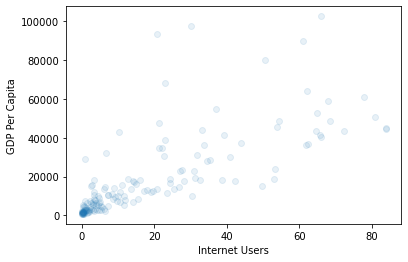

In [24]:
# 2004 internet vs gdp
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, alpha=0.1)
plt.xlabel('Internet Users')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

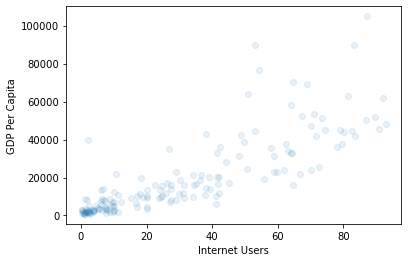

In [25]:
# 2009 internet vs gdp
plt.scatter(gdp_internet_2009.Internet_Users_Pct, gdp_internet_2009.GDP_Per_Capita, alpha=0.1)
plt.xlabel('Internet Users')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

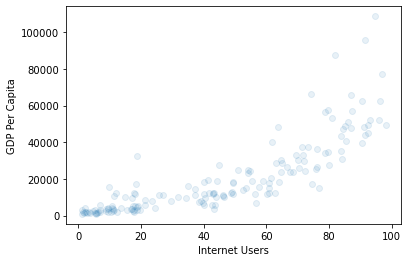

In [26]:
# 2014 internet vs gdp
plt.scatter(gdp_internet_2014.Internet_Users_Pct, gdp_internet_2014.GDP_Per_Capita, alpha=0.1)
plt.xlabel('Internet Users')
plt.ylabel('GDP Per Capita')

#### 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

As time progresses the cluster of low-income and low-gdp starts to fan out from the bottom left of the graph (indicating the lowest of both categories. The heat map shows clusters of darker cells migrating toward more internet users, but this is not refleted with a higher gdp per capita. Furthermore, the fields of internet users and gdp fill out as years progress; however, there is not such a direct concentration of trends reflected in the cluster of low-income and low-gdp data points.

#### 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Yes, the GDP per capita for 2014 is unimodal.

(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

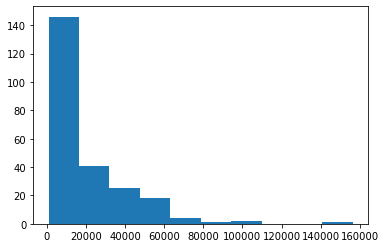

In [27]:
# Add labels to x, y axis

plt.hist(gdp_internet_2014.GDP_Per_Capita)

#### 26. Look at the distribution of Internet Use for 2014. Is it unimodal?

No, the internet use for 2014 is bimodal.

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <BarContainer object of 10 artists>)

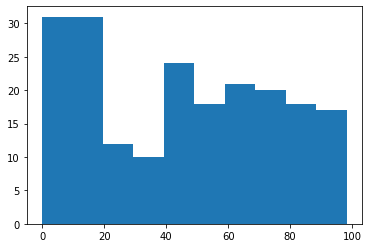

In [28]:
# Add labels to x, y axis

plt.hist(gdp_internet_2014.Internet_Users_Pct)

#### 27. What are the top 5 countries in terms of internet use in 2014?

In [29]:
gdp_internet_2014.sort_values(["Internet_Users_Pct"], ascending=False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


In [30]:
# Robert's Code:
gdp_internet_2014.nlargest(5,['Internet_Users_Pct'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


#### 28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [31]:
top_5_internet = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"]) & gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
561   Bermuda  2014    77361.104881           96.800000
566   Bermuda  2009    89961.982744           83.250000
571   Bermuda  2004    90195.811033           60.990867
1452  Denmark  2014    52214.537753           95.990000
1457  Denmark  2009    50274.075696           86.840000
1462  Denmark  2004    50607.628971           80.930000
2625  Iceland  2014    49652.149500           98.160000
2630  Iceland  2009    48177.084123           93.000000
2635  Iceland  2004    45145.545658           83.880000
4648   Norway  2014    62589.373548           96.300000
4653   Norway  2009    61886.564498           92.080000
4658   Norway  2004    60893.410993           77.690000
6871  Andorra  2014             NaN           95.900000
6876  Andorra  2009             NaN           78.530000
6881  Andorra  2004             NaN           26.837954


#### 29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

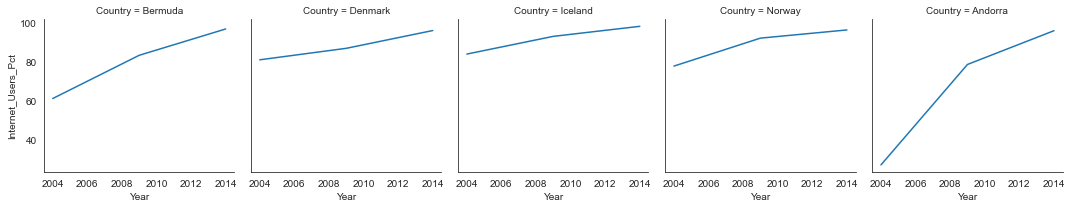

In [32]:
sns.set_style('white')
top_countries = sns.FacetGrid(top_5_internet, col="Country")
top_countries.map(sns.lineplot, "Year","Internet_Users_Pct")
plt.show()

#### 30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [33]:
gdp_internet_2014.sort_values(["Internet_Users_Pct"], ascending=True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


In [34]:
bottom_5_internet = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste", "Burundi", "Somalia"]) & gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(bottom_5_internet)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                       Burundi  2014      886.235777            1.380000
832                       Burundi  2009      831.564131            0.900000
837                       Burundi  2004      817.460585            0.349060
6219                  Timor-Leste  2014     3264.568070            1.140000
6224                  Timor-Leste  2009     2724.770973            0.185252
6229                  Timor-Leste  2004     2258.608056                 NaN
7079  Dem. People's Rep. of Korea  2014             NaN            0.000000
7083  Dem. People's Rep. of Korea  2009             NaN            0.000000
7088  Dem. People's Rep. of Korea  2004             NaN            0.000000
7137                      Eritrea  2014             NaN            0.990000
7142                      Eritrea  2009             NaN            0.540000
7674                      Somalia  2014             NaN            1.630000
7678        

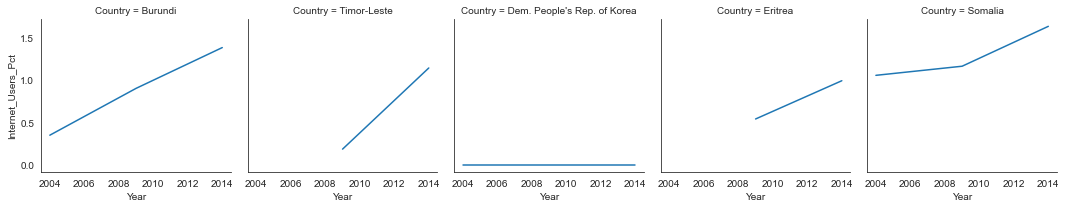

In [35]:
sns.set_style("white")
top_countries = sns.FacetGrid(bottom_5_internet, col="Country")
top_countries.map(sns.lineplot, "Year","Internet_Users_Pct")
plt.show()

#### 31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [36]:
gdp_internet_2014.sort_values(["GDP_Per_Capita"], ascending=False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [37]:
top_5_gdp = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Macao SAR, China", "Luxembourg", "Qatar", "Singapore", "Bermuda"]) & gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(top_5_gdp)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
561            Bermuda  2014    77361.104881           96.800000
566            Bermuda  2009    89961.982744           83.250000
571            Bermuda  2004    90195.811033           60.990867
3691        Luxembourg  2014   108760.916030           94.670000
3696        Luxembourg  2009   104932.811953           87.310000
3701        Luxembourg  2004   102708.212547           65.880000
3721  Macao SAR, China  2014   156514.133850                 NaN
3726  Macao SAR, China  2009    95939.340822                 NaN
3731  Macao SAR, China  2004    72944.409424                 NaN
5138             Qatar  2014    95578.416973           91.490000
5143             Qatar  2009    89954.519993           53.100000
5148             Qatar  2004    93748.301216           20.701648
5464         Singapore  2014    87808.663157           82.000000
5469         Singapore  2009    69466.581746           69.000000
5474         Singapore  2

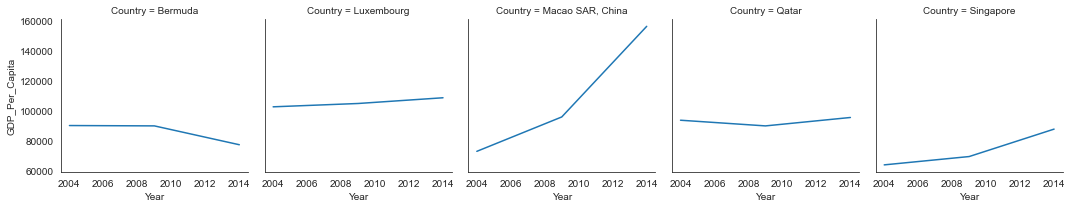

In [38]:
sns.set_style("white")
top_countries = sns.FacetGrid(top_5_gdp, col="Country")
top_countries.map(sns.lineplot, "Year","GDP_Per_Capita")
plt.show()

#### 32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [39]:
gdp_internet_2014.sort_values(["GDP_Per_Capita"], ascending=True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [40]:
bottom_5_gdp = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Central African Republic", "Burundi", "Malawi", "Dem. Rep. Congo", "Niger"]) & gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(bottom_5_gdp)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                    Burundi  2014      886.235777            1.380000
832                    Burundi  2009      831.564131            0.900000
837                    Burundi  2004      817.460585            0.349060
1047  Central African Republic  2014      822.610458                 NaN
1052  Central African Republic  2009     1161.189475                 NaN
1057  Central African Republic  2004     1037.846766                 NaN
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
1427           Dem. Rep. Congo  2009      835.611696                 NaN
1432           Dem. Rep. Congo  2004      757.685942                 NaN
3781                    Malawi  2014     1027.208496            5.830000
3786                    Malawi  2009      932.867635            1.070000
3791                    Malawi  2004      775.346132            0.347505
4528                     Niger  2014     1127.61554

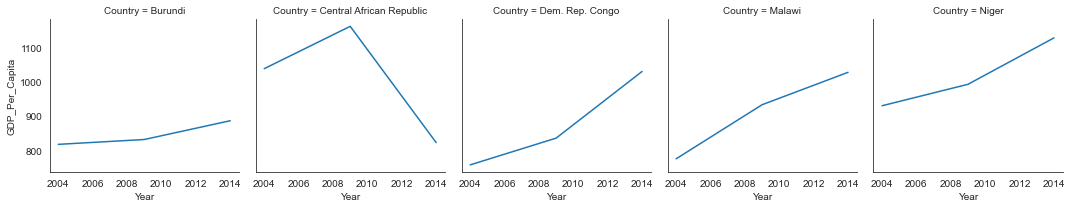

In [41]:
# Largely a copy and paste from question 30
# Graphs will look the same, only change is data from internet users to GDP per capita
sns.set_style("white")
top_countries = sns.FacetGrid(bottom_5_gdp, col="Country")
top_countries.map(sns.lineplot, "Year","GDP_Per_Capita")
plt.show()

#### 33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?